In [1]:
from multal_lib import *

oct_al = align_parse("oct_versus_all_multal.txt")
bim_al = align_parse("bim_versus_all_multal.txt")
sep_al = align_parse("sep_versus_all_multal.txt")
squ_al = align_parse("squ_versus_all_multal.txt")

In [19]:
from Bio import SeqIO
import re
from os import listdir
from os.path import isfile, join

def read_sites_data(fname):
    file2positions = {}
    all_pos = 0
    with open(fname) as f:
        f.readline()
        for line in f:
            s = line.strip().split()
            name, pos, degree = s[0], int(s[3]), float(s[7]) 

            if not name in file2positions:
                file2positions[name] = {}
            file2positions[name][pos] = degree
            all_pos += 1
    print(all_pos)
    return file2positions

def get_all_A_pos_for_transcript(fname):    
    name2as = {}
    name2len = {}
    name2unred = {}
    seqs = SeqIO.parse(fname, "fasta")
    for seq in seqs:
        name = str(seq.id)
        s = str(seq.seq)
        co = [m.start()+1 for m in re.finditer('A', s)]
        name2as[name] = co
        name2len[name] = len(s)
    return name2as, name2unred, name2len

def read_RNA_sec_structure_coverage(dirname, name2len):
    mypath = dirname
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    name2cov = {}
    k = 1
    for fi in onlyfiles:
        if k%1000 == 0: print(k)
        with open(join(mypath, fi)) as f:
            name = fi.split(".")[0]
            cov = [0] * name2len[name]
            for line in f:
                s = line.strip().split()
                begin, end, score = int(s[1]), int(s[2]), float(s[4])
                for i in range(begin, end):
                    cov[i] = min(cov[i], score)
            name2cov[name] = cov
        k += 1
    return name2cov

def get_red_stat(file2positions, name2cov, name2len, t, e=100):
    red_struc = 0
    red_unstruc = 0

    for name in name2len:
        cov = name2cov[name]
        if name in file2positions:
            pos2deg = file2positions[name]
            for pos in pos2deg:
                if pos2deg[pos] < t or pos2deg[pos] > e: continue
                pos = pos - 1
                if cov[pos] == 0:
                    red_unstruc += 1
                else:
                    red_struc += 1
        
    a = red_struc/(red_unstruc + red_struc)  
    return a, red_unstruc+red_struc

In [3]:
import pandas as pd

oct_data = read_sites_data("oct_bim2oct_conserved_plus.txt")
bim_data = read_sites_data("bim_bim2oct_conserved_plus.txt")

sep_data = read_sites_data("sep_sep2squ_conserved_plus.txt")
squ_data = read_sites_data("squ_sep2squ_conserved_plus.txt")

oct_all_data = read_sites_data("oct_all_conserved_plus.txt")
sep_all_data = read_sites_data("sep_all_conserved_plus.txt")

35878
35878
16233
16233
1146
1146


In [10]:
names = ["oct", "bim", "squ", "sep", "nau", "apl"]

name2as_oct, name2unred_oct, name2len_oct = get_all_A_pos_for_transcript("orfs_oct_plus.fa")
name2as_sep, name2unred_sep, name2len_sep = get_all_A_pos_for_transcript("orfs_sep_plus.fa")
name2cov_oct = read_RNA_sec_structure_coverage("oct", name2len_oct)
name2cov_sep = read_RNA_sec_structure_coverage("sep", name2len_sep)

name2as_bim, name2unred_bim, name2len_bim = get_all_A_pos_for_transcript("orfs_bim_plus.fa")
name2as_squ, name2unred_squ, name2len_squ = get_all_A_pos_for_transcript("orfs_squ_plus.fa")
name2cov_bim = read_RNA_sec_structure_coverage("bim", name2len_bim)
name2cov_squ = read_RNA_sec_structure_coverage("squ", name2len_squ)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [20]:
percentage = []
cons_type = []
fraction = []
all_counts = []

for i in range (20, 101, 20): 
    fr, a = get_red_stat(oct_data, name2cov_oct, name2len_oct, i-20, i)
    all_counts.append(a)
    fraction.append(fr)
    percentage.append(str(i-20) + "-" + str(i))
    cons_type.append("oct-bim")
    
    fr, a = get_red_stat(sep_data, name2cov_sep, name2len_sep, i-20, i)
    all_counts.append(a)
    fraction.append(fr)
    percentage.append(str(i-20) + "-" + str(i))
    cons_type.append("sep-squ")
    
    fr, a = get_red_stat(oct_all_data, name2cov_oct, name2len_oct, i-20, i)
    all_counts.append(a)
    fraction.append(fr)
    percentage.append(str(i-20) + "-" + str(i))
    cons_type.append("all")
    
fraction2 = []
all_counts2 = []

for i in range (20, 101, 20): 
    fr, a = get_red_stat(bim_data, name2cov_bim, name2len_bim, i-20, i)
    fraction2.append(fr)
    all_counts2.append(a)
    
    fr, a = get_red_stat(squ_data, name2cov_squ, name2len_squ, i-20, i)
    fraction2.append(fr)
    all_counts2.append(a)
    
    fr, a = get_red_stat(sep_all_data, name2cov_sep, name2len_sep, i-20, i)
    fraction2.append(fr)
    all_counts2.append(a)
    
fraction_new = [(fraction[i] + fraction2[i])/2 for i in range(len(fraction))] 
all_counts_new = [(all_counts[i] + all_counts2[i])/2 for i in range(len(all_counts))] 
fraction = fraction_new

print(all_counts_new)

[29649.0, 11840.0, 675.0, 3446.5, 1863.5, 180.0, 1531.0, 1011.5, 109.5, 970.0, 974.5, 114.5, 349.0, 594.0, 68.0]


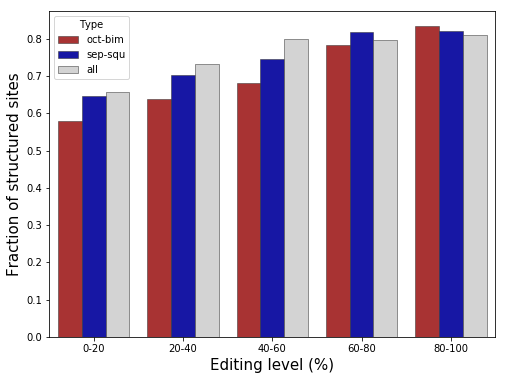

In [30]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

width, height = 8, 6
mpl.rcParams['figure.figsize'] = [width, height]
clrs = ["#BB2020", "#0000BB", "lightgray"]


d = {"Editing level (%)": percentage, "Type": cons_type, "Fraction of structured sites": fraction}
df = pd.DataFrame(data=d)

bar = sns.barplot(x="Editing level (%)", y="Fraction of structured sites", hue="Type", data=df, palette=clrs, linewidth=0.5, edgecolor=".2")

plt.xlabel("Editing level (%)", size=15)
plt.ylabel("Fraction of structured sites", size=15)

plt.savefig("cons.pdf", format="pdf")
plt.show()

In [24]:
print(all_counts_new)
print(fraction)
str_counts = [fraction[i]*all_counts_new[i] for i in range(len(fraction))]
nonstr_counts = [(1-fraction[i])*all_counts_new[i] for i in range(len(fraction))]
print()

[29649.0, 11840.0, 675.0, 3446.5, 1863.5, 180.0, 1531.0, 1011.5, 109.5, 970.0, 974.5, 114.5, 349.0, 594.0, 68.0]
[0.5780919791217533, 0.6476599402717271, 0.6580302341066566, 0.6397347393885309, 0.7021496577242334, 0.7311145510835914, 0.6821016612160349, 0.7448763171339479, 0.7987987987987988, 0.7845927700348432, 0.8173085590903042, 0.7979657882570503, 0.8339445682802709, 0.821971710601749, 0.8090909090909091]



In [32]:
import scipy.stats as stats

for i in range(5):
    for t in range(3):
        if t == 2:
            ar = [str_counts[i*3 + 2], str_counts[i*3]]
            ar2 = [nonstr_counts[i*3 + 2], nonstr_counts[i*3]]
            pers = [percentage[i*3 + 2], percentage[i*3]]
            cons = [cons_type[i*3 + 2], cons_type[i*3]]
        else:
            ar = str_counts[i*3 + t: i*3 + t+2]
            ar2 = nonstr_counts[i*3 + t: i*3 + t+2]
            pers = [percentage[i*3 + t: i*3 + t+2]]
            cons = [cons_type[i*3 + t: i*3 + t+2]]
        
        oddsratio, pvalue = stats.fisher_exact([ar, ar2]) 
        if pvalue < 0.05:
            print(pers)
            print(cons)
            #print(ar, ar2)
            print(pvalue)
            print()


['0-20', '0-20']
[['oct-bim', 'sep-squ']]
2.75148347402e-39

0-20
['all', 'oct-bim']
2.35531467462e-05

['20-40', '20-40']
[['oct-bim', 'sep-squ']]
4.41869158622e-06

20-40
['all', 'oct-bim']
0.012874748393

['40-60', '40-60']
[['oct-bim', 'sep-squ']]
0.000711172114807

40-60
['all', 'oct-bim']
0.0132801666763

